In [80]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [81]:
dataset = pd.read_csv("diabetes.csv")
print("Les 6 premières lignes de la base de données :")
print(dataset.head(6))
print("\nLes 6 dernières lignes de la base de données :")
print(dataset.tail(6))
print("\nLa forme du dataset (lignes, colonnes) :")
print(dataset.shape)


Les 6 premières lignes de la base de données :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  

Les 6 dernières lignes de la base de données :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
762            9  

afficher les histogrammes des caractéristiques en fonction de leurs apparitions


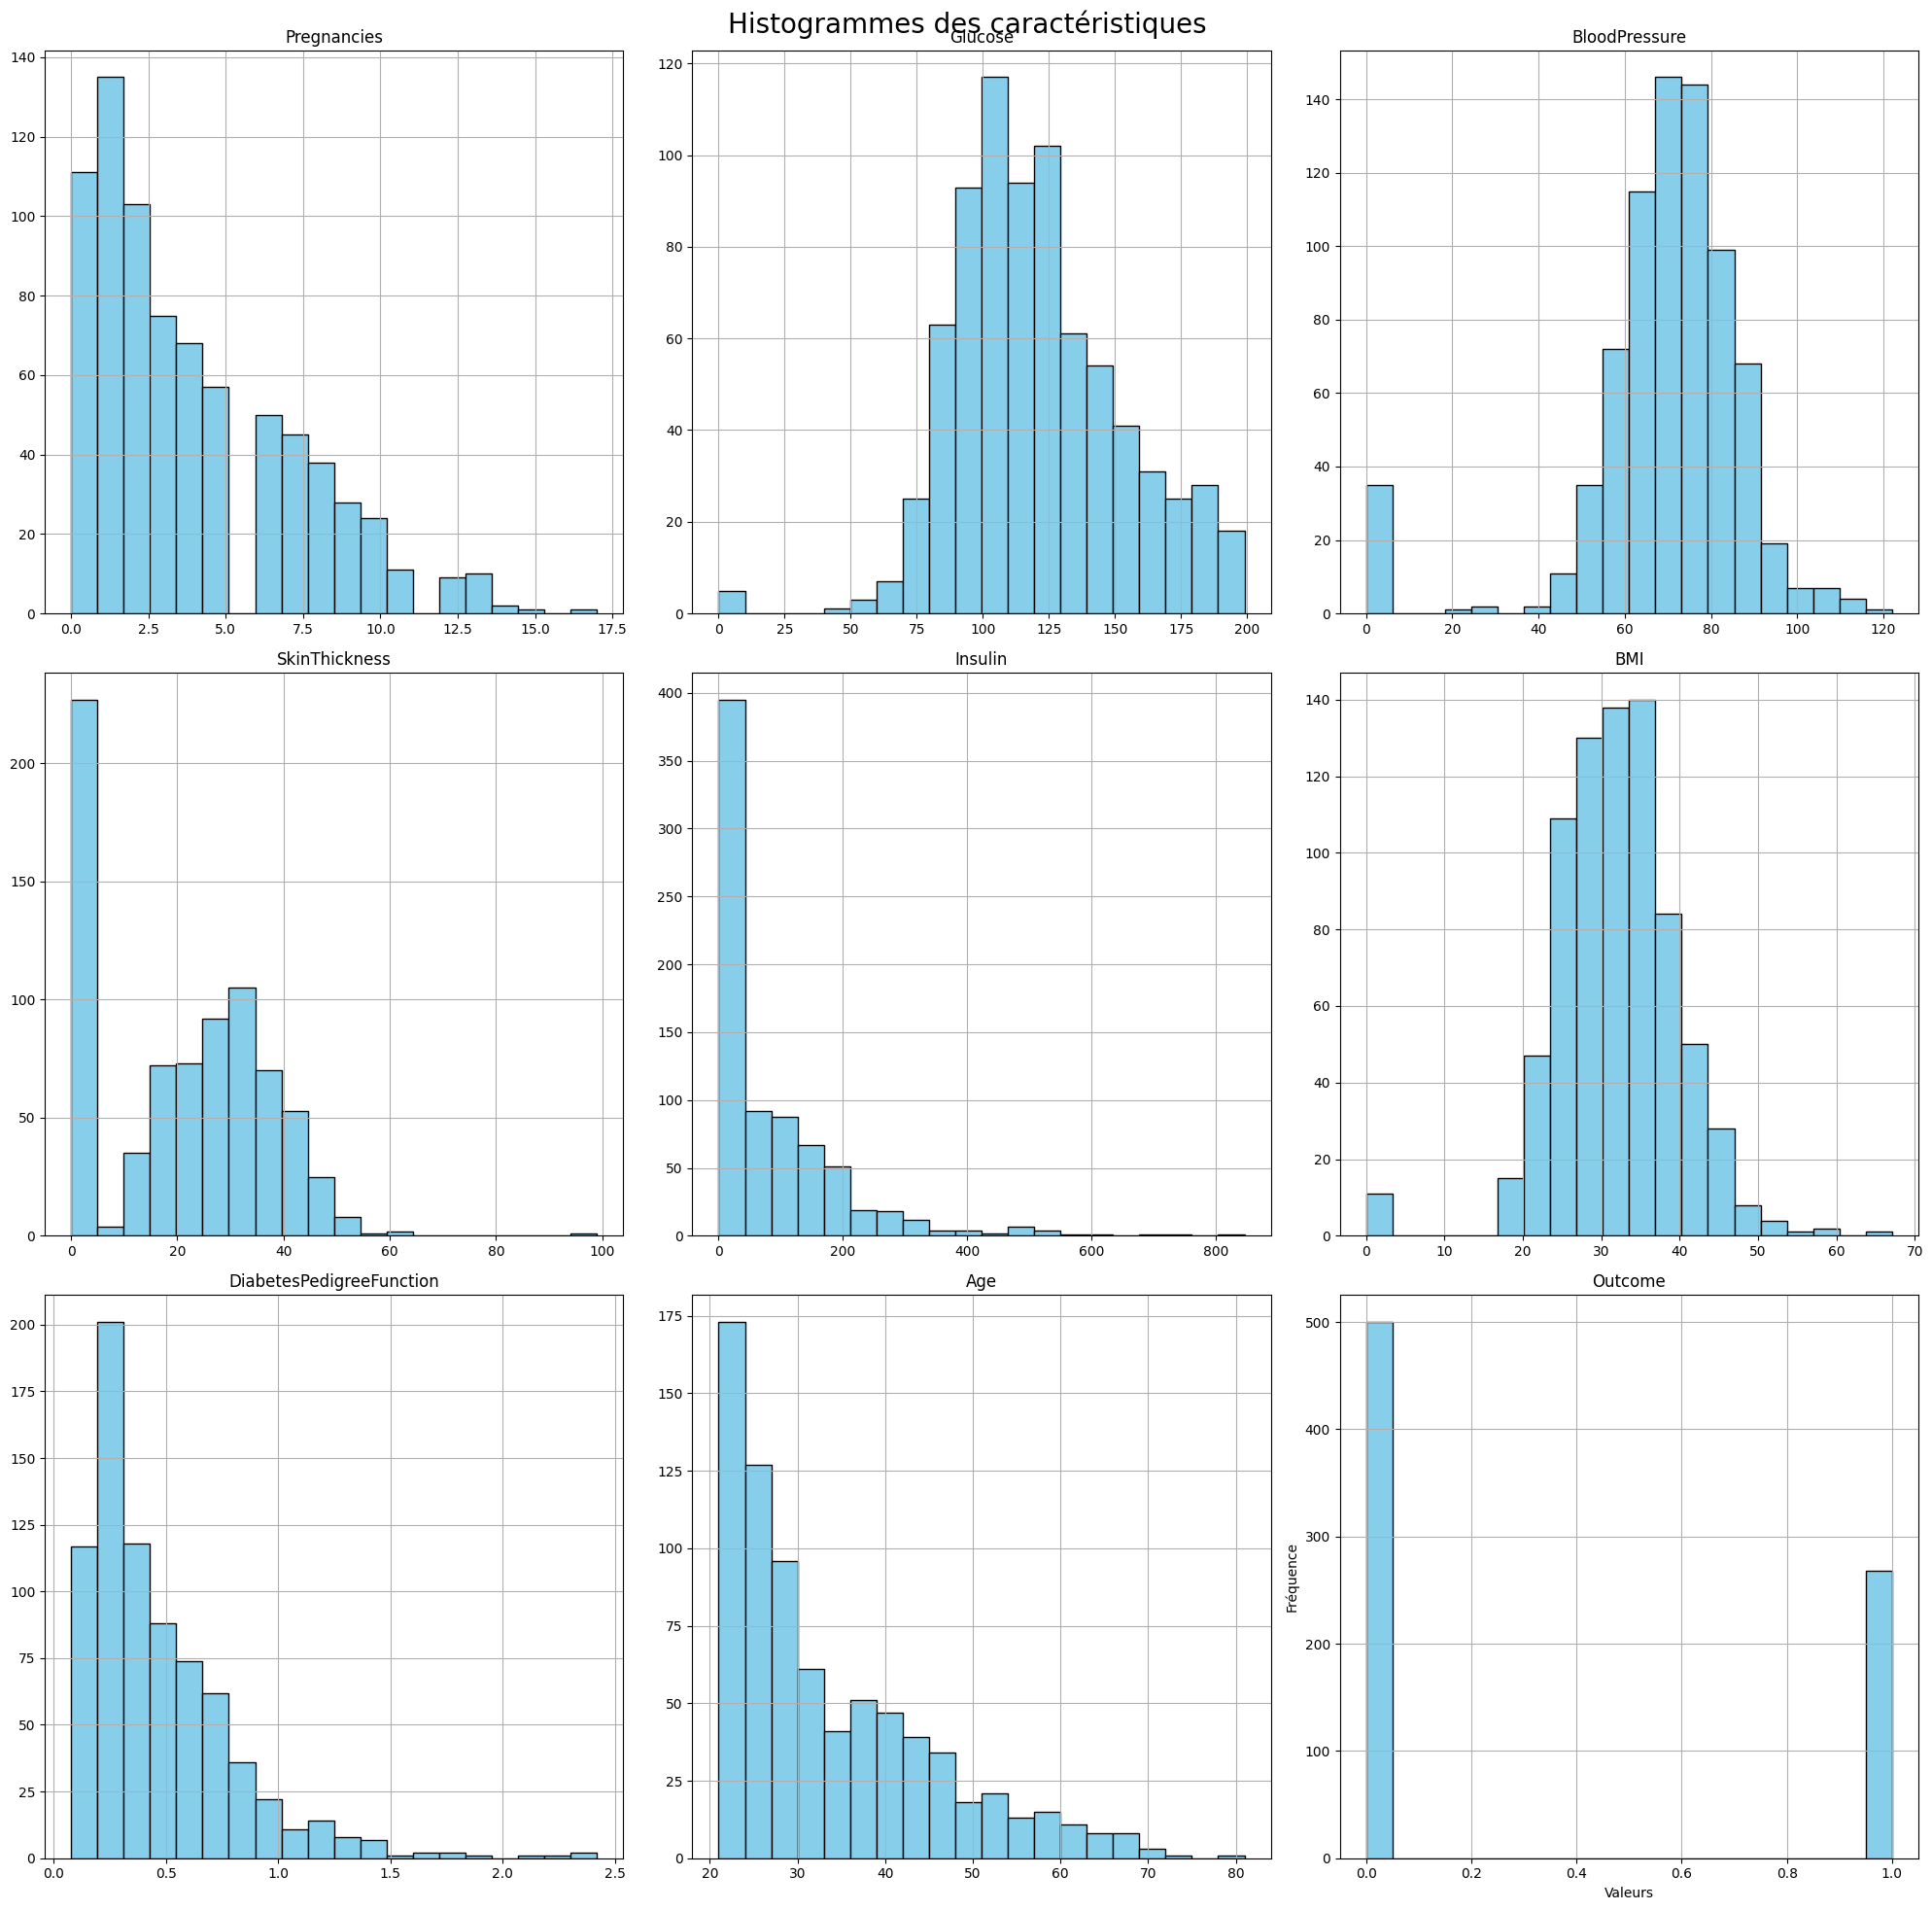

In [82]:
print("afficher les histogrammes des caractéristiques en fonction de leurs apparitions")
dataset.hist(figsize=(20, 20), bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.suptitle("Histogrammes des caractéristiques", fontsize=20)
plt.tight_layout()
plt.show()

Distribution des valeurs de la colonne Outcome :
Outcome
0    500
1    268
Name: count, dtype: int64


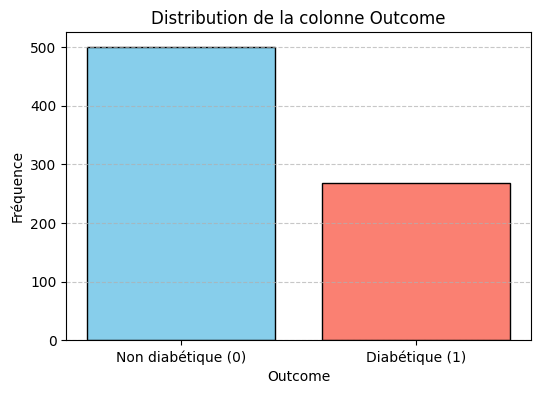

In [83]:
distribution = dataset['Outcome'].value_counts()
print("Distribution des valeurs de la colonne Outcome :")
print(distribution)

plt.figure(figsize=(6, 4))
plt.bar(distribution.index, distribution.values, color=['skyblue', 'salmon'], edgecolor='black')
plt.xticks([0, 1], ['Non diabétique (0)', 'Diabétique (1)'])
plt.title("Distribution de la colonne Outcome")
plt.xlabel("Outcome")
plt.ylabel("Fréquence")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [84]:
X=dataset[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
Y=dataset[["Outcome"]]

In [85]:
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)

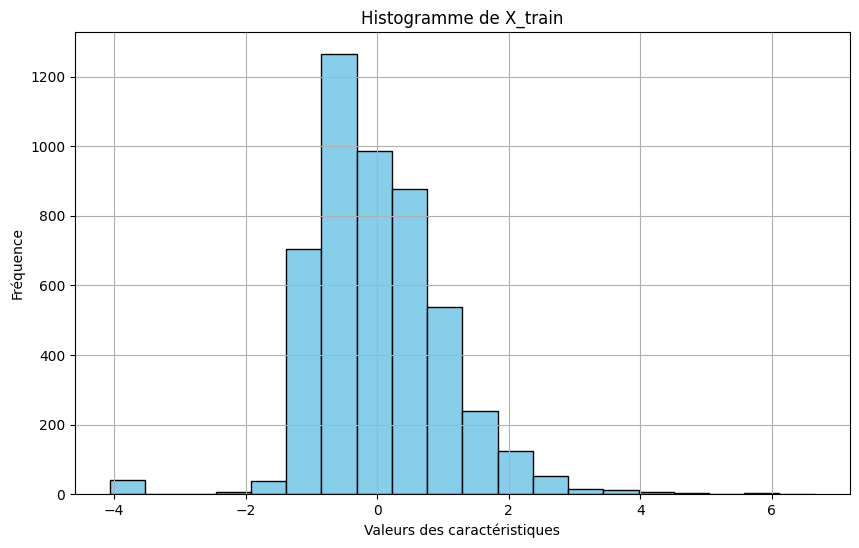

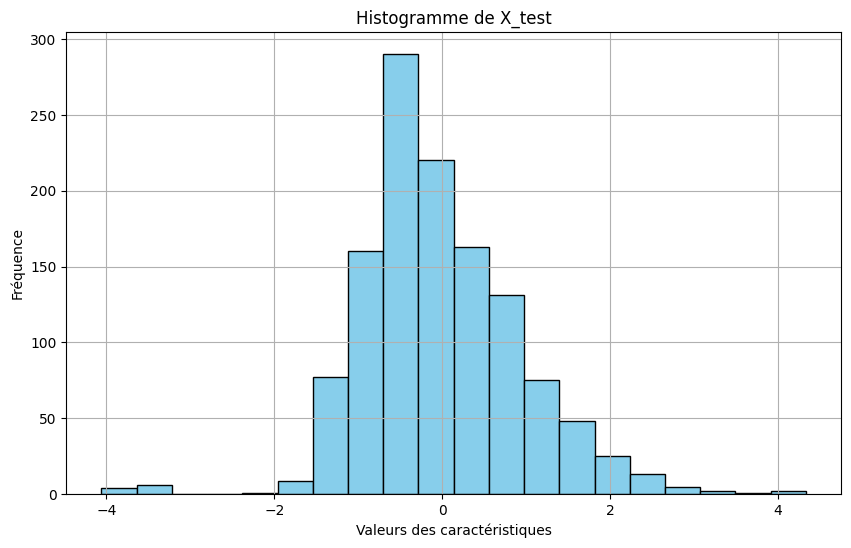

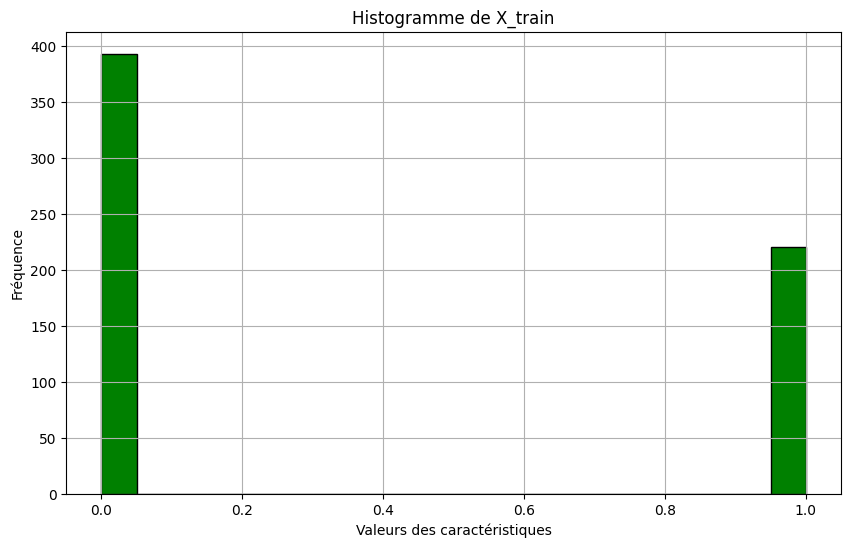

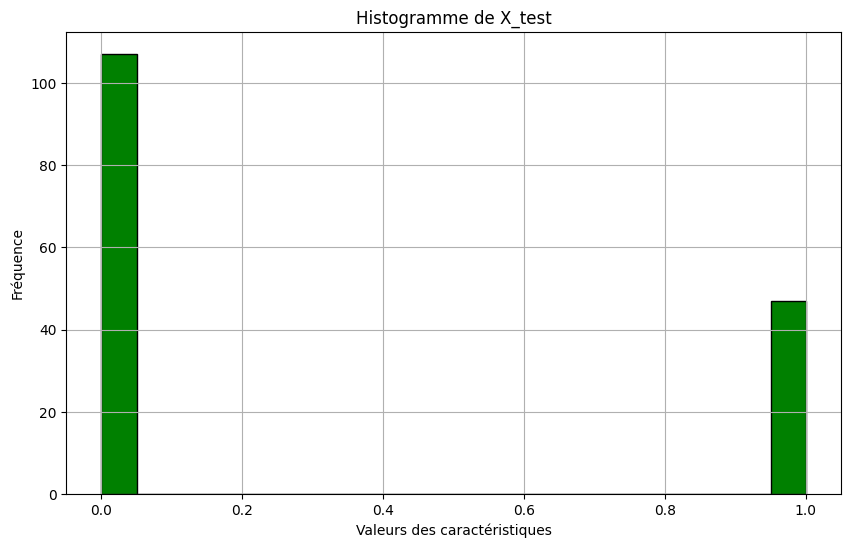

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Histogramme pour l'ensemble X_train
plt.figure(figsize=(10, 6))
plt.hist(x_train.flatten(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histogramme de X_train")
plt.xlabel("Valeurs des caractéristiques")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()
# Histogramme pour l'ensemble X_test
plt.figure(figsize=(10, 6))
plt.hist(x_test.flatten(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histogramme de X_test")
plt.xlabel("Valeurs des caractéristiques")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()
# Histogramme pour l'ensemble Y_train
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=20, color='green', edgecolor='black')
plt.title("Histogramme de X_train")
plt.xlabel("Valeurs des caractéristiques")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()
# Histogramme pour l'ensemble Y_test
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, color='green', edgecolor='black')
plt.title("Histogramme de X_test")
plt.xlabel("Valeurs des caractéristiques")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


In [87]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
train_prediction=classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(f"Accuracy sur l'ensemble de train : {train_accuracy * 100:.2f}%")
test_prediction = classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)
print(f"Accuracy sur l'ensemble de test : {test_accuracy * 100:.2f}%")

Accuracy sur l'ensemble de train : 76.22%
Accuracy sur l'ensemble de test : 82.47%


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


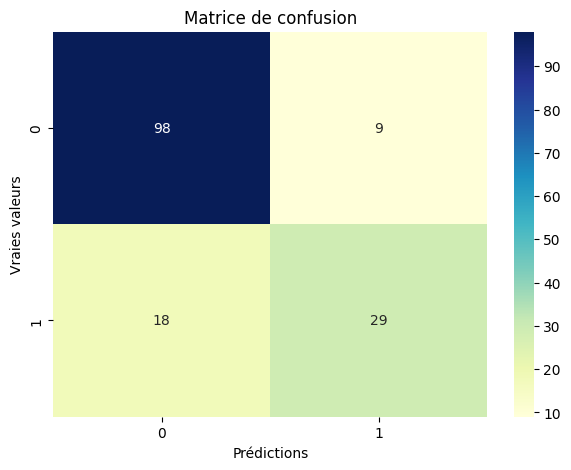

In [88]:
# Matrice de confusion
cnf_matrix = metrics.confusion_matrix(y_test, test_prediction) 
plt.figure(figsize=(7, 5))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

In [89]:
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = standardScaler.transform(input_data_reshaped)
print("Données normalisées :")
print(std_data)
prediction = classifier.predict(std_data)
print("Prédiction :", prediction)
if prediction[0] == 0:
    print("La personne n'est pas diabétique")
else:
    print("La personne est diabétique")

Données normalisées :
[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
Prédiction : [1]
La personne est diabétique


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
